# Importing Libraries and loading dataset

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "mohammedelhamamsy"
os.environ['KAGGLE_KEY'] = "419252cb53c0bf05fa91e17d8969c445"

In [ ]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 60.6MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 21.9MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 57.5MB/s]


In [ ]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import numpy as np
import pandas as pd
train_data=pd.read_csv("./train.csv")
test_data=pd.read_csv("./test.csv")

In [ ]:
train_data = train_data.drop(['id', 'keyword', 'location'], axis=1)
test_data = test_data.drop(['id', 'keyword', 'location'], axis=1)

train_data.columns = ['text', 'sentiment']
train_data.sentiment=train_data.sentiment.astype(np.object)
train_data.head()

,text,sentiment
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       7613 non-null   object
 1   sentiment  7613 non-null   object
dtypes: object(2)
memory usage: 119.1+ KB


Text(0.5, 1.0, 'Sentiment Data Distribution')

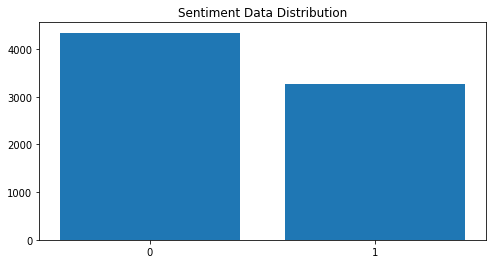

In [ ]:
val_count = train_data.sentiment.astype(np.character).value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
import random
random_idx_list = [random.randint(1,len(train_data.text)) for i in range(10)]
train_data.loc[random_idx_list,:].head(10)

,text,sentiment
5989,@HimeRuisu I'm going to ram your ass so hard I...,0
5989,@HimeRuisu I'm going to ram your ass so hard I...,0
2649,Apollo Brown - Detonate (ft. M.O.P.) http://t....,0
1709,Mind blown by @GlassAnimals slithering viscous...,0
1414,Civilian Casualties in Afghanistan Reach Recor...,1
6499,Hank Williams Jr. - 'Country Boys Can Survive'...,0
6735,Thunderstorm in Helsinki\n#thunder #lightning ...,1
3864,So Pardon me while I burst into flames. \n\nI'...,0
4718,@eles_kaylee @Jannellix0 so she puts on a diff...,0
5444,UNWANTED PERSON at 200 BLOCK OF SE 12TH AVE PO...,0


# Text Preprocessing Trial (Skipped)


In [ ]:
import re
import unicodedata
import html
def text_preprocessing(text):
  #remove mentions; starting with @
  text=' '.join(filter(lambda x:x[0]!='@', text.split()))

  #Retain words like what's or human-like as one word
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  text=' '.join([re_punc.sub('', w) for w in text.split()])

  #Case Normalization
  text=text.lower()

  #Removing Stopwords
  stop_words = stopwords.words('english')
  text =' '.join([w for w in text.split() if w not in stop_words])

  #Stemming the words using porter 
  porter = PorterStemmer()
  text=' '.join([porter.stem(word) for word in text.split()])

  #Decode Unicode characters into a normalized form
  text=unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

  #
  text = text.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
    'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
    '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
    ' @-@ ','-').replace('\\', ' \\ ')
  re1 = re.compile(r'  +')
  text= re1.sub(' ', html.unescape(text))

  return text

text_preprocessing("@rami human-like robots are Dump, watch me playing 1")

'humanlik robot dump watch play 1'

# Text Preprocessing



> ## Preprocessing Pipeline



In [ ]:
def remove_mentions(text):
  return ' '.join(filter(lambda x:x[0]!='@', text.split()))

def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_mentions(text)
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [ ]:
trn_corpus=train_data.text.apply(normalize_text).tolist()
tst_corpus=test_data.text.apply(normalize_text).tolist()
full_corpus = (' '.join(trn_corpus) + ' ' + ' '.join(tst_corpus)).split()

In [ ]:
# Creating the corpus with the word counts 
from collections import Counter
word_counts = Counter(full_corpus)

word_counts={k: v for k, v in sorted(word_counts.items(), key=lambda item: item[1], reverse=True)}

str2idx = {key:val for key,val in word_counts.items()}
idx2str = {val:key for key,val in word_counts.items()}

In [ ]:
str2idx

{'get': 639,
 'like': 557,
 'fire': 520,
 'u': 458,
 'im': 419,
 'go': 397,
 'new': 326,
 'via': 325,
 'bomb': 324,
 'one': 293,
 'news': 290,
 'say': 284,
 'people': 281,
 'dont': 260,
 'burn': 257,
 'kill': 249,
 'time': 245,
 'make': 242,
 'attack': 238,
 'video': 237,
 'flood': 231,
 'crash': 229,
 'emergency': 228,
 'build': 227,
 'come': 223,
 'disaster': 220,
 'think': 214,
 'see': 213,
 'year': 213,
 'take': 212,
 'would': 206,
 'body': 201,
 'police': 196,
 'day': 193,
 'look': 190,
 'know': 189,
 'watch': 187,
 'life': 184,
 'storm': 182,
 'home': 181,
 'still': 180,
 'family': 180,
 'love': 177,
 'train': 176,
 'suicide': 174,
 'collapse': 167,
 'first': 166,
 'rt': 163,
 'scream': 162,
 'bag': 162,
 'back': 161,
 'world': 159,
 'california': 158,
 'want': 156,
 'car': 155,
 'death': 153,
 'drown': 151,
 'need': 150,
 'cause': 149,
 'man': 147,
 'work': 147,
 'two': 146,
 'today': 146,
 'pm': 144,
 'cant': 142,
 'hiroshima': 142,
 'service': 141,
 'nuclear': 141,
 'full': 14

In [ ]:
from keras.preprocessing.text import Tokenizer

texts = trn_corpus + tst_corpus
texts[:10]

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident ask shelter place notify officer evacuation shelter place order expect',
 'people receive wildfire evacuation order california',
 'get send photo ruby alaska smoke wildfire pour school',
 'rockyfire update california hwy close direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flood street manitou colorado spring area',
 'im top hill see fire wood',
 'there emergency evacuation happen build across street',
 'im afraid tornado come area']

In [ ]:
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(texts)

In [ ]:
len(tok.word_index)

21901

In [ ]:
s = 'hbhjbhj World'
l=tok.texts_to_sequences([s.split()])

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen = max([len(t) for t in texts])

l = np.array(pad_sequences(l,
                          maxlen=maxlen,
                          padding='post',
                          truncating='post'))
l.shape

(1, 137)

In [ ]:
l

array([[ 1, 53,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

# 2- Train 3 BoW models for the following features:



> # Binary Features



In [ ]:
vocab_sz = 10000 
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
#tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(trn_corpus + tst_corpus)
#vocab_sz = len(tok.word_index) # If all possible vocab, else, it's the predefine vocab_sz. Remember we cannot always use the len(tok.word_index), since it's always the max.

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_corpus, mode='binary')
x_test = tok.texts_to_matrix(tst_corpus, mode='binary')

y_train=train_data.sentiment

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dropout
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(
    16
    , activation='relu'
    , input_shape=(10000,)
    ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),))
model.add(Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
from sklearn.model_selection import train_test_split

x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
48/48 [==============================] - 2s 24ms/step - loss: 0.7144 - binary_accuracy: 0.4782 - val_loss: 0.7077 - val_binary_accuracy: 0.5397
Epoch 2/50
48/48 [==============================] - 1s 14ms/step - loss: 0.7065 - binary_accuracy: 0.5289 - val_loss: 0.7025 - val_binary_accuracy: 0.6257
Epoch 3/50
48/48 [==============================] - 1s 13ms/step - loss: 0.7016 - binary_accuracy: 0.5724 - val_loss: 0.6985 - val_binary_accuracy: 0.6316
Epoch 4/50
48/48 [==============================] - 1s 13ms/step - loss: 0.6978 - binary_accuracy: 0.5982 - val_loss: 0.6953 - val_binary_accuracy: 0.6303
Epoch 5/50
48/48 [==============================] - 1s 13ms/step - loss: 0.6947 - binary_accuracy: 0.6082 - val_loss: 0.6926 - val_binary_accuracy: 0.6428
Epoch 6/50
48/48 [==============================] - 1s 13ms/step - loss: 0.6922 - binary_accuracy: 0.6306 - val_loss: 0.6902 - val_binary_accuracy: 0.6513
Epoch 7/50
48/48 [==============================] - 1s 13ms/step - los

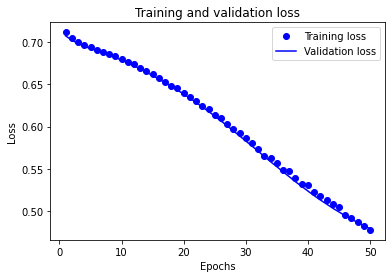

In [ ]:
history_dict = history.history
history_dict.keys()


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

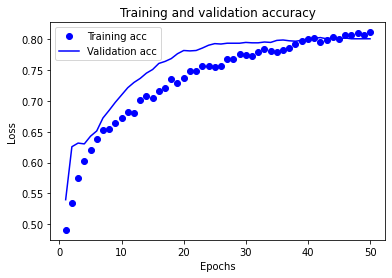

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



> # Counts Features



In [ ]:
vocab_sz = 10000 
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
#tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(trn_corpus + tst_corpus)
#vocab_sz = len(tok.word_index) # If all possible vocab, else, it's the predefine vocab_sz. Remember we cannot always use the len(tok.word_index), since it's always the max.

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_corpus, mode='count')
x_test = tok.texts_to_matrix(tst_corpus, mode='count')

y_train=train_data.sentiment

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dropout
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(
    16
    , activation='relu'
    , input_shape=(10000,)
    ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),))
model.add(Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
from sklearn.model_selection import train_test_split

x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
48/48 [==============================] - 1s 16ms/step - loss: 0.7129 - binary_accuracy: 0.5083 - val_loss: 0.7064 - val_binary_accuracy: 0.5758
Epoch 2/50
48/48 [==============================] - 1s 14ms/step - loss: 0.7058 - binary_accuracy: 0.5465 - val_loss: 0.7007 - val_binary_accuracy: 0.5942
Epoch 3/50
48/48 [==============================] - 1s 13ms/step - loss: 0.6998 - binary_accuracy: 0.5637 - val_loss: 0.6960 - val_binary_accuracy: 0.5870
Epoch 4/50
48/48 [==============================] - 1s 12ms/step - loss: 0.6962 - binary_accuracy: 0.5771 - val_loss: 0.6921 - val_binary_accuracy: 0.5883
Epoch 5/50
48/48 [==============================] - 1s 13ms/step - loss: 0.6931 - binary_accuracy: 0.5737 - val_loss: 0.6889 - val_binary_accuracy: 0.5857
Epoch 6/50
48/48 [==============================] - 1s 13ms/step - loss: 0.6897 - binary_accuracy: 0.5858 - val_loss: 0.6860 - val_binary_accuracy: 0.5844
Epoch 7/50
48/48 [==============================] - 1s 13ms/step - los

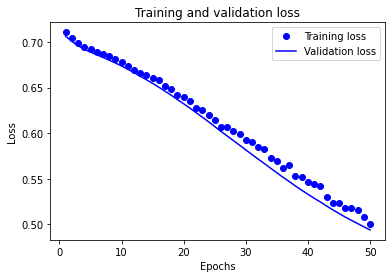

In [ ]:
history_dict = history.history
history_dict.keys()


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

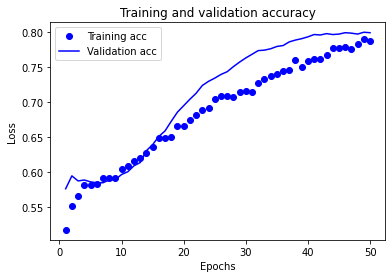

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



> # Freq Features



In [ ]:
vocab_sz = 10000 
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
#tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(trn_corpus + tst_corpus)
#vocab_sz = len(tok.word_index) # If all possible vocab, else, it's the predefine vocab_sz. Remember we cannot always use the len(tok.word_index), since it's always the max.

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_corpus, mode='freq')
x_test = tok.texts_to_matrix(tst_corpus, mode='freq')

y_train=train_data.sentiment

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dropout
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(
    16
    , activation='relu'
    , input_shape=(10000,)
    ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),))
model.add(Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
from sklearn.model_selection import train_test_split

x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
48/48 [==============================] - 1s 16ms/step - loss: 0.6960 - binary_accuracy: 0.5473 - val_loss: 0.6302 - val_binary_accuracy: 0.5817
Epoch 2/50
48/48 [==============================] - 1s 12ms/step - loss: 0.6264 - binary_accuracy: 0.6930 - val_loss: 0.5701 - val_binary_accuracy: 0.7676
Epoch 3/50
48/48 [==============================] - 1s 12ms/step - loss: 0.5743 - binary_accuracy: 0.7850 - val_loss: 0.5557 - val_binary_accuracy: 0.7741
Epoch 4/50
48/48 [==============================] - 1s 13ms/step - loss: 0.5423 - binary_accuracy: 0.7927 - val_loss: 0.5535 - val_binary_accuracy: 0.7669
Epoch 5/50
48/48 [==============================] - 1s 12ms/step - loss: 0.5387 - binary_accuracy: 0.7827 - val_loss: 0.5599 - val_binary_accuracy: 0.7807
Epoch 6/50
48/48 [==============================] - 1s 14ms/step - loss: 0.5204 - binary_accuracy: 0.8026 - val_loss: 0.5746 - val_binary_accuracy: 0.7708
Epoch 7/50
48/48 [==============================] - 1s 13ms/step - los

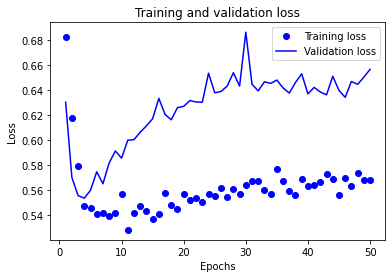

In [ ]:
history_dict = history.history
history_dict.keys()


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

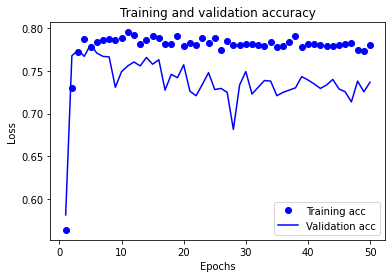

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



> # TF-IDF Features



In [ ]:
vocab_sz = 10000 
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
#tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(trn_corpus + tst_corpus)
#vocab_sz = len(tok.word_index) # If all possible vocab, else, it's the predefine vocab_sz. Remember we cannot always use the len(tok.word_index), since it's always the max.

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_corpus, mode='tfidf')
x_test = tok.texts_to_matrix(tst_corpus, mode='tfidf')

y_train=train_data.sentiment

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dropout
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(
    16
    , activation='relu'
    , input_shape=(10000,)
    ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)               

In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
from sklearn.model_selection import train_test_split

x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
48/48 [==============================] - 2s 17ms/step - loss: 0.7128 - binary_accuracy: 0.5493 - val_loss: 0.7059 - val_binary_accuracy: 0.5831
Epoch 2/50
48/48 [==============================] - 1s 13ms/step - loss: 0.7032 - binary_accuracy: 0.5655 - val_loss: 0.7017 - val_binary_accuracy: 0.5824
Epoch 3/50
48/48 [==============================] - 1s 13ms/step - loss: 0.6982 - binary_accuracy: 0.5592 - val_loss: 0.6978 - val_binary_accuracy: 0.5817
Epoch 4/50
48/48 [==============================] - 1s 13ms/step - loss: 0.6966 - binary_accuracy: 0.5485 - val_loss: 0.6945 - val_binary_accuracy: 0.5817
Epoch 5/50
48/48 [==============================] - 1s 13ms/step - loss: 0.6895 - binary_accuracy: 0.5640 - val_loss: 0.6904 - val_binary_accuracy: 0.5817
Epoch 6/50
48/48 [==============================] - 1s 13ms/step - loss: 0.6820 - binary_accuracy: 0.5692 - val_loss: 0.6855 - val_binary_accuracy: 0.5817
Epoch 7/50
48/48 [==============================] - 1s 13ms/step - los

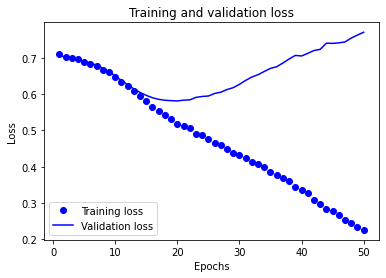

In [ ]:
history_dict = history.history
history_dict.keys()


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

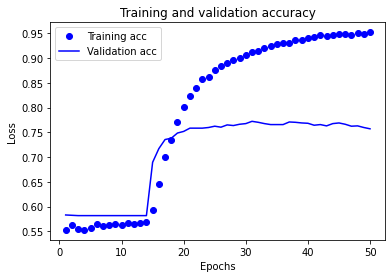

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



> > #### TFIDF yields the best accuracy for validation set.
> > #### Strangely, count features yiels better accuracy than frequency features. Although the other way around should be the case as the features are between 0 and 1. 



# Using TFIDF without the data preprocessing pipeline







In [ ]:
trn_no_prep=train_data.text.tolist()
tst_no_prep=test_data.text.tolist()
no_prep_text = (' '.join(trn_no_prep) + ' ' + ' '.join(tst_no_prep)).split()

# Creating the corpus with the word counts 
from collections import Counter
no_prep_counts = Counter(no_prep_text)

no_prep_counts={k: v for k, v in sorted(no_prep_counts.items(), key=lambda item: item[1], reverse=True)}

str2idx_no_prep = {key:val for key,val in no_prep_counts.items()}
idx2str_no_prep = {val:key for key,val in no_prep_counts.items()}

In [ ]:
vocab_sz = 10000 
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
#tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(trn_no_prep + tst_no_prep)
#vocab_sz = len(tok.word_index) # If all possible vocab, else, it's the predefine vocab_sz. Remember we cannot always use the len(tok.word_index), since it's always the max.

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_no_prep, mode='tfidf')
x_test = tok.texts_to_matrix(tst_no_prep, mode='tfidf')

y_train=train_data.sentiment

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dropout
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(
    16
    , activation='relu'
    , input_shape=(10000,)
    ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_15 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)               

In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
from sklearn.model_selection import train_test_split

x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0)

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/50
12/12 [==============================] - 2s 55ms/step - loss: 0.7271 - binary_accuracy: 0.4801 - val_loss: 0.7145 - val_binary_accuracy: 0.4997
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 0.7186 - binary_accuracy: 0.4950 - val_loss: 0.7105 - val_binary_accuracy: 0.5568
Epoch 3/50
12/12 [==============================] - 0s 41ms/step - loss: 0.7138 - binary_accuracy: 0.5187 - val_loss: 0.7075 - val_binary_accuracy: 0.5968
Epoch 4/50
12/12 [==============================] - 0s 39ms/step - loss: 0.7127 - binary_accuracy: 0.5156 - val_loss: 0.7050 - val_binary_accuracy: 0.6106
Epoch 5/50
12/12 [==============================] - 1s 43ms/step - loss: 0.7105 - binary_accuracy: 0.5236 - val_loss: 0.7026 - val_binary_accuracy: 0.6225
Epoch 6/50
12/12 [==============================] - 0s 39ms/step - loss: 0.7064 - binary_accuracy: 0.5429 - val_loss: 0.7001 - val_binary_accuracy: 0.6369
Epoch 7/50
12/12 [==============================] - 1s 43ms/step - los

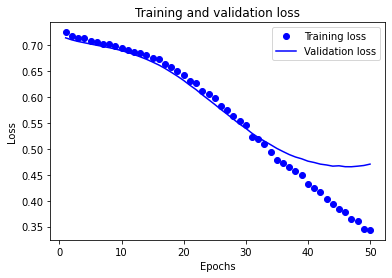

In [ ]:
history_dict = history.history
history_dict.keys()


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

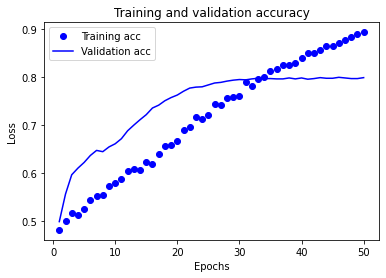

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Developing BoW vectors model with learnable Embeddings


In [ ]:
from keras.datasets import imdb
vocab_size = 10000

tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
#tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(trn_corpus + tst_corpus)
#vocab_sz = len(tok.word_index) # If all possible vocab, else, it's the predefine vocab_sz. Remember we cannot always use the len(tok.word_index), since it's always the max.

# Extract binary BoW features
x_train = tok.texts_to_sequences(trn_corpus)
y_train=train_data.sentiment

y_train = np.asarray(y_train).astype('float32')

max_length = 100
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')

partial_x_train, x_val, partial_y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
x_train

array([[4561,  451,  208, ...,    0,    0,    0],
       [ 118,    4,  168, ...,    0,    0,    0],
       [1271,  473, 1759, ...,    0,    0,    0],
       ...,
       [4126,  412, 1330, ...,    0,    0,    0],
       [  34,  860, 3280, ...,    0,    0,    0],
       [ 185,   41,  433, ...,    0,    0,    0]], dtype=int32)

In [ ]:
n_latent_factors = 25
model = models.Sequential()
model.add(layers.Embedding(vocab_sz+1, n_latent_factors, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 25)           250025    
_________________________________________________________________
flatten_1 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                40016     
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 290,330
Trainable params: 290,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
15/15 [==============================] - 1s 25ms/step - loss: 0.6841 - binary_accuracy: 0.5681 - val_loss: 0.6636 - val_binary_accuracy: 0.5739
Epoch 2/20
15/15 [==============================] - 0s 15ms/step - loss: 0.6581 - binary_accuracy: 0.5921 - val_loss: 0.6217 - val_binary_accuracy: 0.7623
Epoch 3/20
15/15 [==============================] - 0s 15ms/step - loss: 0.6103 - binary_accuracy: 0.7241 - val_loss: 0.5638 - val_binary_accuracy: 0.7295
Epoch 4/20
15/15 [==============================] - 0s 15ms/step - loss: 0.5556 - binary_accuracy: 0.7727 - val_loss: 0.4984 - val_binary_accuracy: 0.8207
Epoch 5/20
15/15 [==============================] - 0s 15ms/step - loss: 0.4878 - binary_accuracy: 0.8225 - val_loss: 0.4417 - val_binary_accuracy: 0.8450
Epoch 6/20
15/15 [==============================] - 0s 14ms/step - loss: 0.4403 - binary_accuracy: 0.8366 - val_loss: 0.3895 - val_binary_accuracy: 0.8674
Epoch 7/20
15/15 [==============================] - 0s 15ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])